
# Image classification using CNNs

We want to make a Convolutional Neural Network to classify some images. We will also improve the model implementing a data augmentation.

For this we are going to use a CIFAR-10 dataset. This consists of several images divided into 10 categories or classes and it has 60,000 32x32 color images and 6,000 images of each class with a low resolution 32x32.

    - Airplanes
    - Cars 
    - Cats
    - Birds
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks


***Data Source: [https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html)***


# 1- Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset and Train/Test split

In [3]:
from keras.datasets import cifar10

(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

* We have (number of samples, height(px), width(px), color chanel(3))

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# 2 - Data visualization

[2]


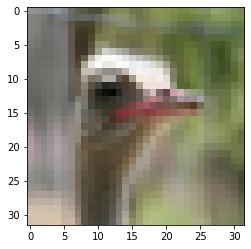

In [8]:
#Let's see some training image
img = 20547
plt.imshow(X_train[img])
print(y_train[img])

/home/david/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


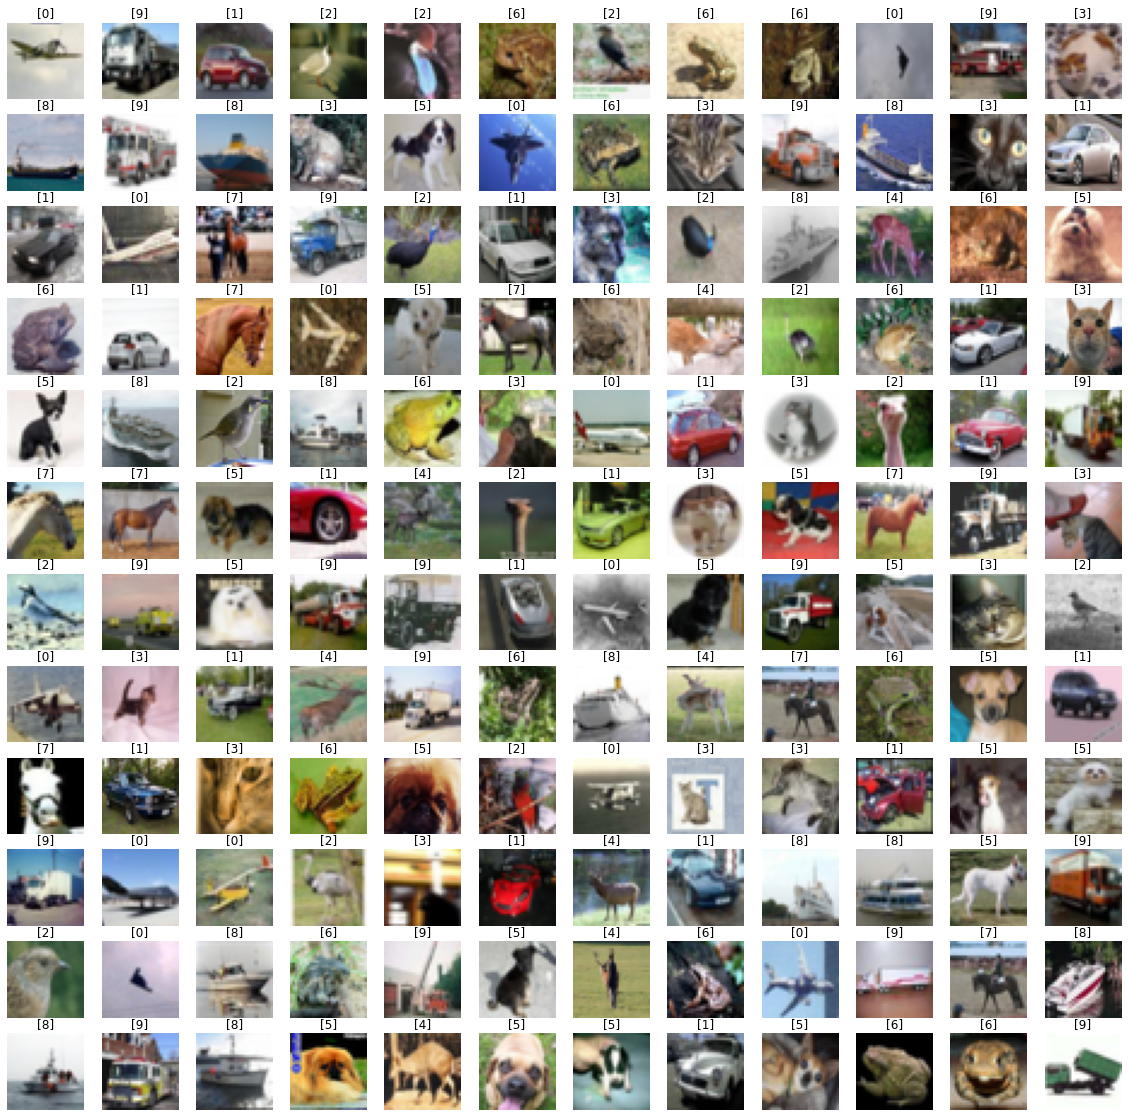

In [9]:
W_grid = 12
L_grid = 12

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20, 20))
axes = axes.ravel()

len_train = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, len_train) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.2)

In [10]:
len_train

50000

# 3- Data preparation

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
#We know we have 10 categories
n_cat = 10

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

* We can see which class is belong to

### Let's put in categorial data.

In [14]:
import keras

y_train = keras.utils.to_categorical(y_train, n_cat)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test = keras.utils.to_categorical(y_test, n_cat)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### Normalize

In [18]:
X_train[0]

array([[[ 59.,  62.,  63.],
        [ 43.,  46.,  45.],
        [ 50.,  48.,  43.],
        ...,
        [158., 132., 108.],
        [152., 125., 102.],
        [148., 124., 103.]],

       [[ 16.,  20.,  20.],
        [  0.,   0.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [123.,  88.,  55.],
        [119.,  83.,  50.],
        [122.,  87.,  57.]],

       [[ 25.,  24.,  21.],
        [ 16.,   7.,   0.],
        [ 49.,  27.,   8.],
        ...,
        [118.,  84.,  50.],
        [120.,  84.,  50.],
        [109.,  73.,  42.]],

       ...,

       [[208., 170.,  96.],
        [201., 153.,  34.],
        [198., 161.,  26.],
        ...,
        [160., 133.,  70.],
        [ 56.,  31.,   7.],
        [ 53.,  34.,  20.]],

       [[180., 139.,  96.],
        [173., 123.,  42.],
        [186., 144.,  30.],
        ...,
        [184., 148.,  94.],
        [ 97.,  62.,  34.],
        [ 83.,  53.,  34.]],

       [[177., 144., 116.],
        [168., 129.,  94.],
        [179., 1

### We can see bunch of numbers indicating the values of the pixels (from 0 to 255), so we are going to normalize them.

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train[5]

array([[[0.62352943, 0.4       , 0.39607844],
        [0.5882353 , 0.35686275, 0.37254903],
        [0.6       , 0.37254903, 0.38039216],
        ...,
        [0.35686275, 0.2784314 , 0.21960784],
        [0.2901961 , 0.24705882, 0.21568628],
        [0.29803923, 0.22745098, 0.21568628]],

       [[0.5568628 , 0.29411766, 0.26666668],
        [0.57254905, 0.28235295, 0.25882354],
        [0.60784316, 0.29803923, 0.25490198],
        ...,
        [0.49803922, 0.4117647 , 0.2784314 ],
        [0.47843137, 0.43529412, 0.3647059 ],
        [0.3372549 , 0.27058825, 0.23921569]],

       [[0.42745098, 0.2627451 , 0.29411766],
        [0.3882353 , 0.22745098, 0.23529412],
        [0.4117647 , 0.23137255, 0.20392157],
        ...,
        [0.5372549 , 0.4392157 , 0.3137255 ],
        [0.6392157 , 0.5176471 , 0.4117647 ],
        [0.3647059 , 0.28235295, 0.2784314 ]],

       ...,

       [[0.95686275, 0.5058824 , 0.27450982],
        [0.9411765 , 0.48235294, 0.25490198],
        [0.94509804, 0

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
input_shape = X_train.shape[1:]

In [23]:
input_shape

(32, 32, 3)

# 4 - Training the model

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

## Convolutional Neural Network building

In [25]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4)) #during training in each iteration 40% of neurons will be randomly turned off


model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units = 1024, activation = 'relu'))

model.add(Dense(units = 1024, activation = 'relu'))

model.add(Dense(units = 10, activation = 'softmax'))

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [27]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 552s 351ms/step - loss: 1.9038 - accuracy: 0.2989
Epoch 2/2
1563/1563 [==============================] - 553s 354ms/step - loss: 1.2795 - accuracy: 0.5521


In [28]:
history.history["accuracy"]

[0.4060400128364563, 0.5683599710464478]

# 5 - Testing and saving the model

In [29]:
evaluation = model.evaluate(X_test, y_test)

print('Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 38s 122ms/step - loss: 1.0831 - accuracy: 0.6546
Accuracy: 0.6546000242233276


## Predicting categories

In [30]:
pred_classes = model.predict_classes(X_test) 
pred_classes

/home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 1, 8, ..., 5, 1, 7])

In [31]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [32]:
y_test = y_test.argmax(1)

In [33]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

## Visualization testing data

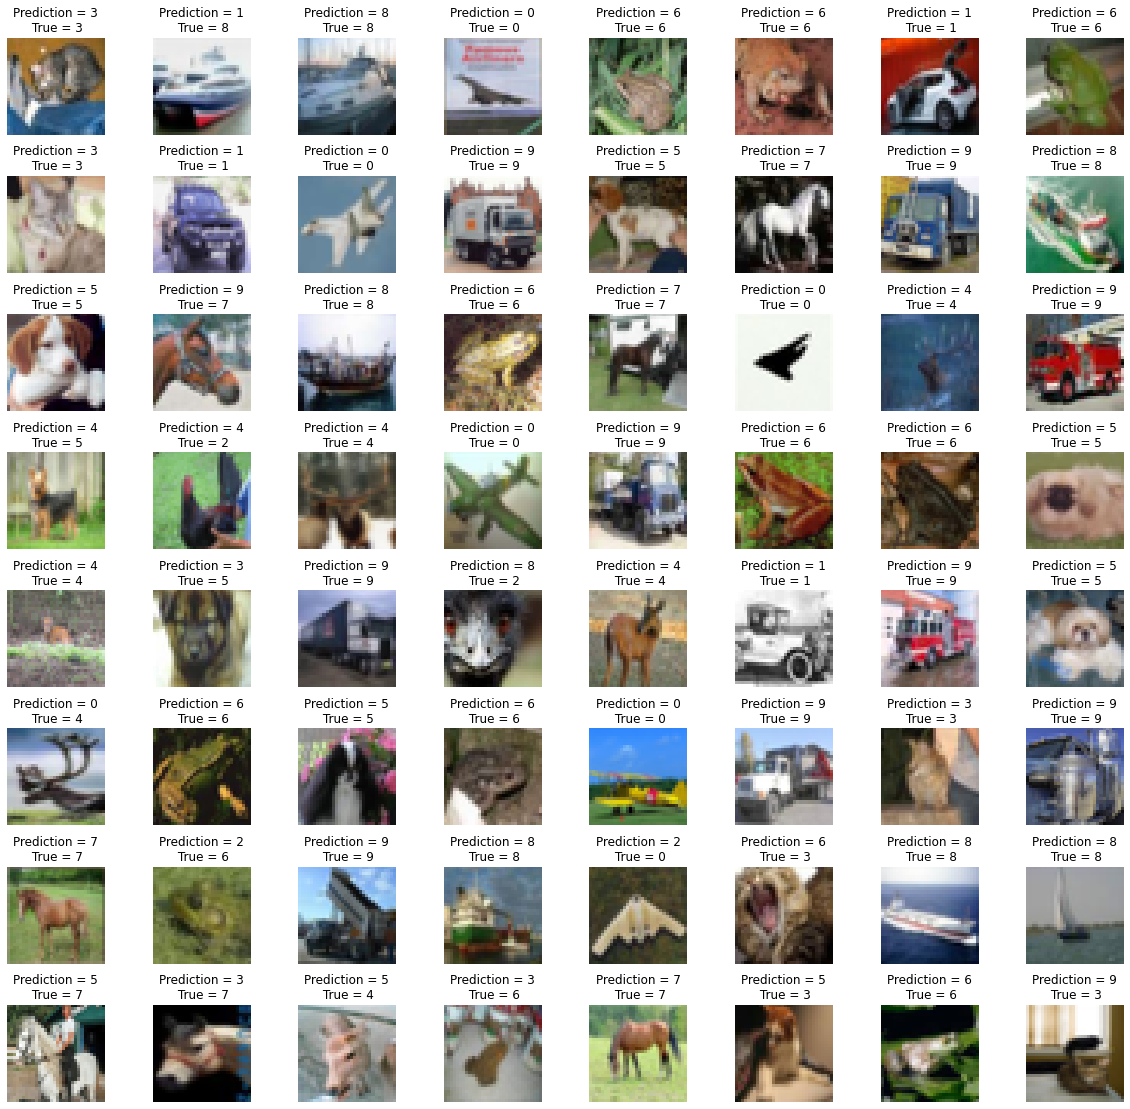

In [34]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(pred_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5, hspace = 0.15)    

### Confusion Matrix

<AxesSubplot:>

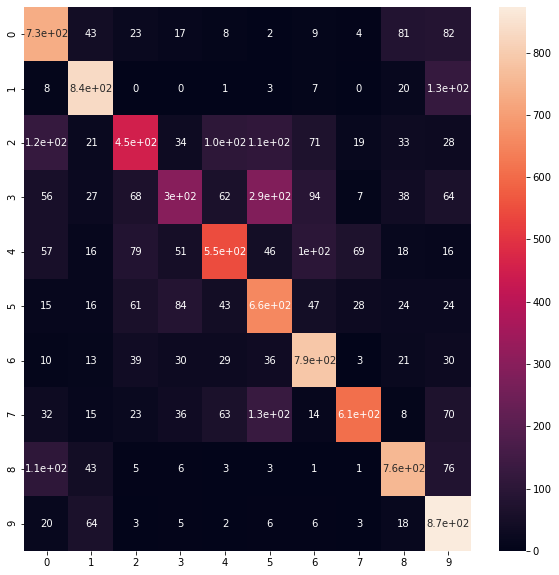

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

## Saving data

In [36]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_trained_model.h5')
model.save(model_path)

# 7 - Data Augmentation

We can imprube our model if we set a data augmentation:

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

***Source: [https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)***

In [37]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [38]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [39]:
X_train.shape

(50000, 32, 32, 3)

In [40]:
n = 8 
X_train_sample = X_train[:n]

In [41]:
X_train_sample.shape

(8, 32, 32, 3)

In [42]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 40) #change rotation
# dataget_train = ImageDataGenerator(vertical_flip=True) #change vertical flip
# dataget_train = ImageDataGenerator(height_shift_range=0.8) #change height shift
dataget_train = ImageDataGenerator(brightness_range=(1,3)) #change brightness


dataget_train.fit(X_train_sample)

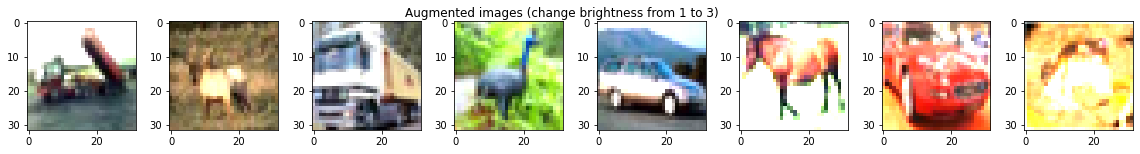

In [43]:
#!pip install scipy==1.1.0
from keras.preprocessing.image import img_to_array
import numpy as np

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            #ax.imshow(toimage(x_batch[i]))
            ax.imshow(img_to_array(x_batch[i]).astype('uint8'))
     fig.suptitle('Augmented images (change brightness from 1 to 3)')
     plt.show()
     break;


## Training model with Data Augmentation

In [44]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 45,
                            width_shift_range = 0.4,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [45]:
datagen.fit(X_train)

In [46]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

/home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
1563/1563 [==============================] - 553s 352ms/step - loss: 2854752474026213376.0000 - accuracy: 0.0019
Epoch 2/2
1563/1563 [==============================] - 482s 308ms/step - loss: nan - accuracy: 0.9398


In [51]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_trained_model_Augmentation.h5')
model.save(model_path)